In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
from scipy.io import loadmat
import random
import scipy
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
carstrain_folder = "data/cars_train/"
car_annotations_path = "data/devkit/cars_train_annos.mat"
car_metadata_path = "data/devkit/cars_meta.mat"

#Loading the Dataset

annotations = loadmat(car_annotations_path)
meta = loadmat(car_metadata_path)
meta = np.concatenate(meta["class_names"][0])

dataset = []
columns = ["x1", "y1", "x2", "y2", "class ID", "Model","Image name"]
for example in annotations["annotations"][0]:
    
    filename = example[-1][0]
    annos = np.concatenate(list(example)[:-1]).ravel().tolist()
    carmodel = meta[example[-2][0] - 1][0]
    dataset.append(annos + [carmodel] + [filename])
    
dataset = pd.DataFrame(dataset, columns=columns)

In [3]:
dataset.head()

,x1,y1,x2,y2,class ID,Model,Image name
0,39,116,569,375,14,Audi TTS Coupe 2012,00001.jpg
1,36,116,868,587,3,Acura TL Sedan 2012,00002.jpg
2,85,109,601,381,91,Dodge Dakota Club Cab 2007,00003.jpg
3,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012,00004.jpg
4,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012,00005.jpg


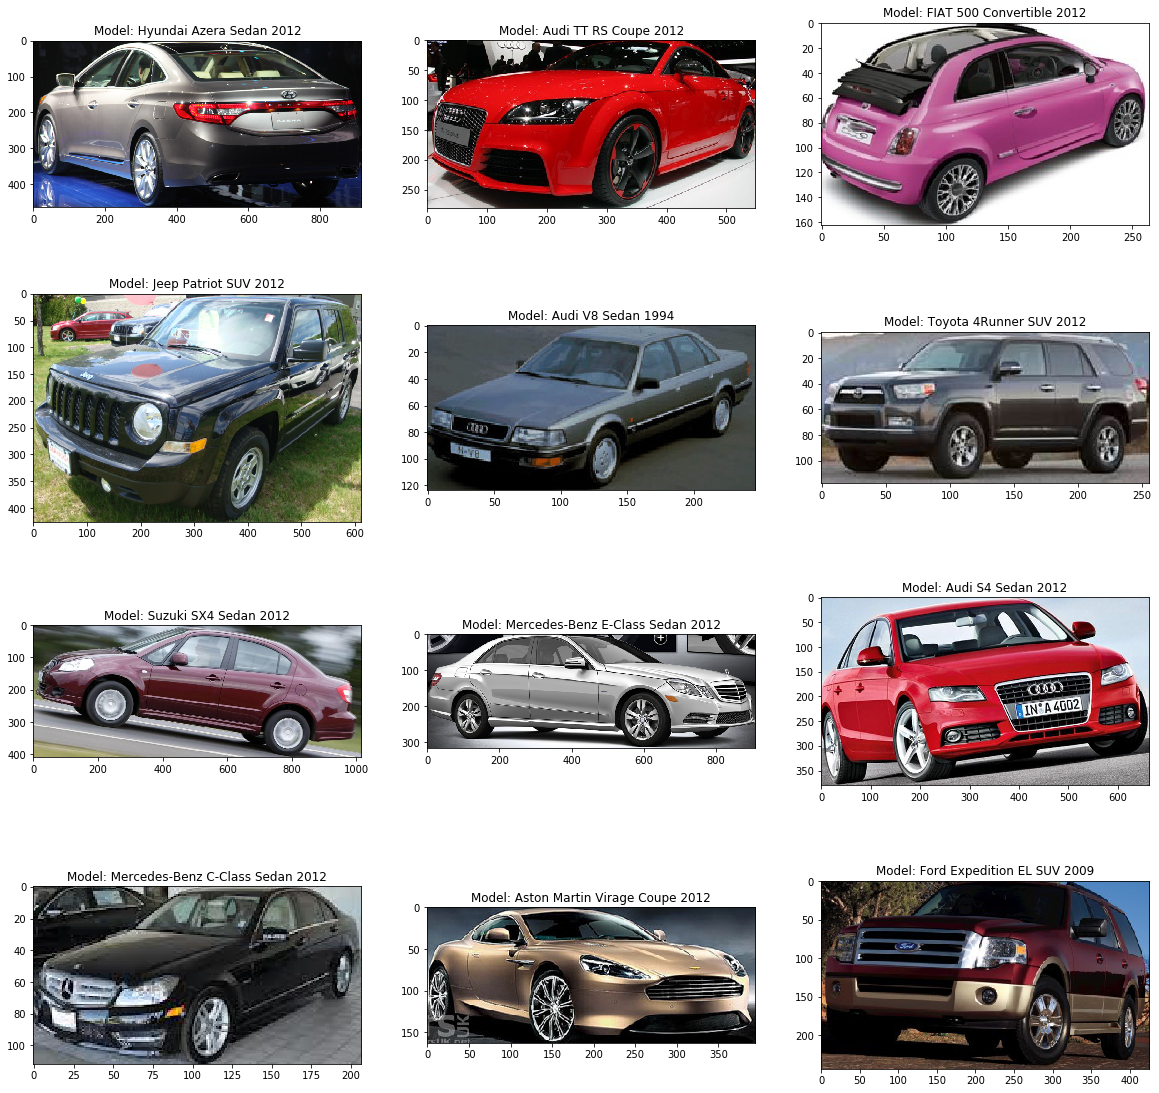

In [4]:
#Quick Sanity Check

#plot some images
fig = plt.figure(figsize=(20,20))
for i in range(1,13):
    plt.subplot(4,3,i)
    
    idx = random.randint(0, annotations["annotations"].shape[1]-1)
    
    image = mpimg.imread(os.path.join(carstrain_folder, dataset.iloc[idx]["Image name"]))
    plt.imshow(image[dataset.iloc[idx]["y1"]: dataset.iloc[idx]["y2"], dataset.iloc[idx]["x1"] : dataset.iloc[idx]["x2"]])
    plt.title("Model: {}".format(dataset.iloc[idx]["Model"]))

plt.show()

In [ ]:
X = []
y = dataset["type ID"].values

for idx, val in enumerate(dataset[["type ID", "Image name"]].values):
    img = mpimg.imread(os.path.join(carstrain_folder, val[1]))
    flatten_img = list(cv2.resize(img[dataset.iloc[idx]["y1"]: dataset.iloc[idx]["y2"], dataset.iloc[idx]["x1"] : dataset.iloc[idx]["x2"]], (224,224)).flatten()/255)
    X.append(flatten_img)
    if idx % 1000 == 0:
        print("{} images done".format(idx))

0 images done
1000 images done
2000 images done
3000 images done
4000 images done


In [66]:
df=pd.DataFrame(X)
df["Y"] = y

In [67]:
import time

In [72]:
#Visualize the Different 
# For reproducability of the results
np.random.seed(42)
N =2000
rndperm = np.random.permutation(df.shape[0])

df_subset = df.loc[rndperm[:N],:].copy()
df_subset.dropna(inplace=True)
data_subset = df_subset.drop(columns=["Y"]).values


tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=10000)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1993 samples in 0.944s...
[t-SNE] Computed neighbors for 1993 samples in 55.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1993
[t-SNE] Computed conditional probabilities for sample 1993 / 1993
[t-SNE] Mean sigma: 4.293504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 127.555084
[t-SNE] KL divergence after 5000 iterations: 2.694271


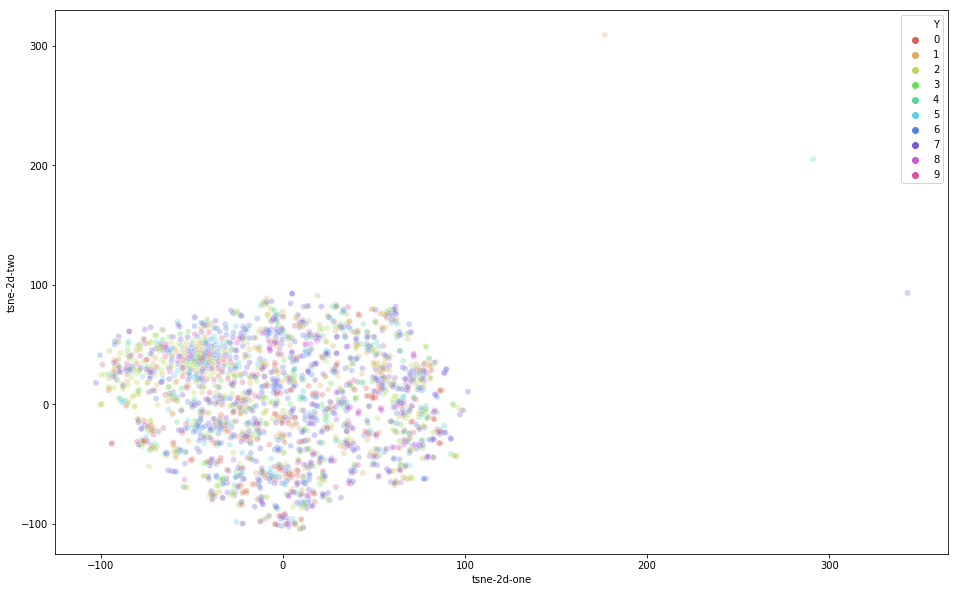

In [73]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Y",
    palette=sns.color_palette("hls", len(df_subset["Y"].value_counts())),
    data=df_subset,
    alpha=0.3
)

In [ ]:
import imblearn

from imblearn.over_sampling import ADASYN

sm = ADASYN()
X, y = sm.fit_sample(X, y)


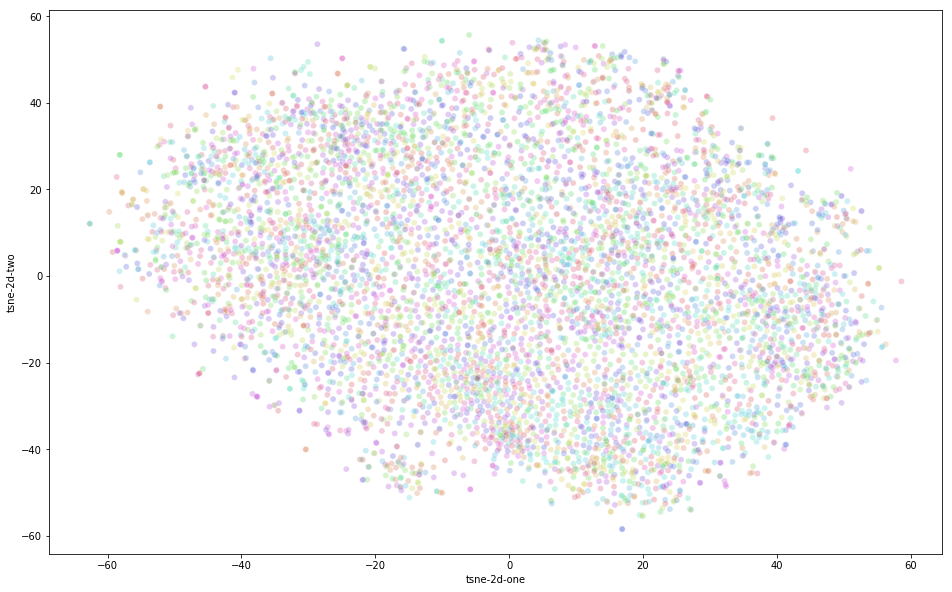

In [107]:
dataset["year"] = [model.split()[-1] for model in dataset["Model"].values]

In [ ]:
dataset.ye

In [61]:
np.any(np.isnan(df))

False

In [31]:
#simple types
car_types = ["Coupe", "Sedan", "Cab", 
             "Minivan", "Hatchback", "Coupe", "Sedan", 
             "Beetle", "Convertible", "Wagon", "SUV", 
             "Van", "SuperCab"]

car_types_2 = ["Coupe", "Sedan", "Cab", "Crew Cab", 
               "Minivan", "Hatchback", "Coupe", "Sedan", 
               "Beetle", "Convertible", "Hybrid SUV", 
               "Rover SUV", "Wagon", "SUV", "Cargo Van",
               "Quad Cab", "SuperCab", "Extended Cab", 
               "Regular Cab", "Van", "Passenger Van"]

In [41]:
dataset["Year"] = [i.split()[-1] for i in dataset.Model.values]

In [47]:
len(dataset)

8144

In [54]:
temps = []
for i in dataset.Model.values:
    notin = False
    for type_ in car_types:
        if type_ in i:
            notin = True
            temps.append(type_)
            break
    
    if notin == False:
        temps.append("None")


In [18]:
"SUV" in 'AM General Hummer SUV 2000'

True

In [56]:
from sklearn import preprocessing
fitter = preprocessing.LabelEncoder()
fitter.fit(temps)

LabelEncoder()

In [60]:
type_id=fitter.transform(temps)

In [62]:
dataset["type ID"] = type_id

In [63]:
dataset

,x1,y1,x2,y2,class ID,Model,Image name,Year,type ID
0,39,116,569,375,14,Audi TTS Coupe 2012,00001.jpg,2012,2
1,36,116,868,587,3,Acura TL Sedan 2012,00002.jpg,2012,7
2,85,109,601,381,91,Dodge Dakota Club Cab 2007,00003.jpg,2007,0
3,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012,00004.jpg,2012,7
4,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012,00005.jpg,2012,0
5,259,289,515,416,123,Geo Metro Convertible 1993,00006.jpg,1993,1
6,88,80,541,397,89,Dodge Journey SUV 2012,00007.jpg,2012,6
7,73,79,591,410,96,Dodge Charger Sedan 2012,00008.jpg,2012,7
8,20,126,1269,771,167,Mitsubishi Lancer Sedan 2012,00009.jpg,2012,7
9,21,110,623,367,58,Chevrolet Traverse SUV 2012,00010.jpg,2012,6


In [59]:
fitter.classes_

array(['Cab', 'Convertible', 'Coupe', 'Hatchback', 'Minivan', 'None',
       'SUV', 'Sedan', 'Van', 'Wagon'], dtype='<U11')

In [20]:
meta[0]

'AM General Hummer SUV 2000'

In [ ]:
>>>
>>> from sklearn import preprocessing
>>> le = preprocessing.LabelEncoder()
>>> le.fit([1, 2, 2, 6])
LabelEncoder()
>>> le.classes_
array([1, 2, 6])
>>> le.transform([1, 1, 2, 6]) 
array([0, 0, 1, 2]...)
>>> le.inverse_transform([0, 0, 1, 2])
array([1, 1, 2, 6])

In [111]:
[model.split()[-3:-1] for model in dataset["Model"].values]

]

[['TTS', 'Coupe'],
 ['TL', 'Sedan'],
 ['Club', 'Cab'],
 ['Hybrid', 'Sedan'],
 ['Crew', 'Cab'],
 ['Metro', 'Convertible'],
 ['Journey', 'SUV'],
 ['Charger', 'Sedan'],
 ['Lancer', 'Sedan'],
 ['Traverse', 'SUV'],
 ['Verano', 'Sedan'],
 ['Sequoia', 'SUV'],
 ['Elantra', 'Sedan'],
 ['Caravan', 'Minivan'],
 ['C30', 'Hatchback'],
 ['Neon', 'Coupe'],
 ['TTS', 'Coupe'],
 ['Malibu', 'Sedan'],
 ['Beetle', 'Hatchback'],
 ['Edition', 'Z06'],
 ['300', 'SRT-8'],
 ['M6', 'Convertible'],
 ['Hybrid', 'SUV'],
 ['Juke', 'Hatchback'],
 ['240', 'Sedan'],
 ['Hybrid', 'Sedan'],
 ['SX4', 'Sedan'],
 ['Crew', 'Cab'],
 ['C8', 'Coupe'],
 ['240', 'Sedan'],
 ['Rover', 'SUV'],
 ['Touring', 'Hatchback'],
 ['Cobalt', 'SS'],
 ['Veracruz', 'SUV'],
 ['Rover', 'SUV'],
 ['Italia', 'Coupe'],
 ['Z4', 'Convertible'],
 ['Charger', 'SRT-8'],
 ['Karma', 'Sedan'],
 ['QX56', 'SUV'],
 ['A5', 'Coupe'],
 ['Golf', 'Hatchback'],
 ['Savana', 'Van'],
 ['Z4', 'Convertible'],
 ['Sequoia', 'SUV'],
 ['RS', 'Coupe'],
 ['240', 'Sedan'],
 ['Phant